In [4]:
import mne 

In [5]:
%pwd

'/volatile/home/sb283337/Bureau/internship/mfa-internship/notebooks'

In [6]:
raw = mne.io.read_raw_fif("../data/sub-01_ses-01_task-rest_proc-filt_raw.fif")

Opening raw data file ../data/sub-01_ses-01_task-rest_proc-filt_raw.fif...
    Range : 34500 ... 116999 =    138.000 ...   467.996 secs
Ready.


In [7]:
raw

<Raw | sub-01_ses-01_task-rest_proc-filt_raw.fif, 356 x 82500 (330.0 s), ~539 KiB, data not loaded>

Using matplotlib as 2D backend.


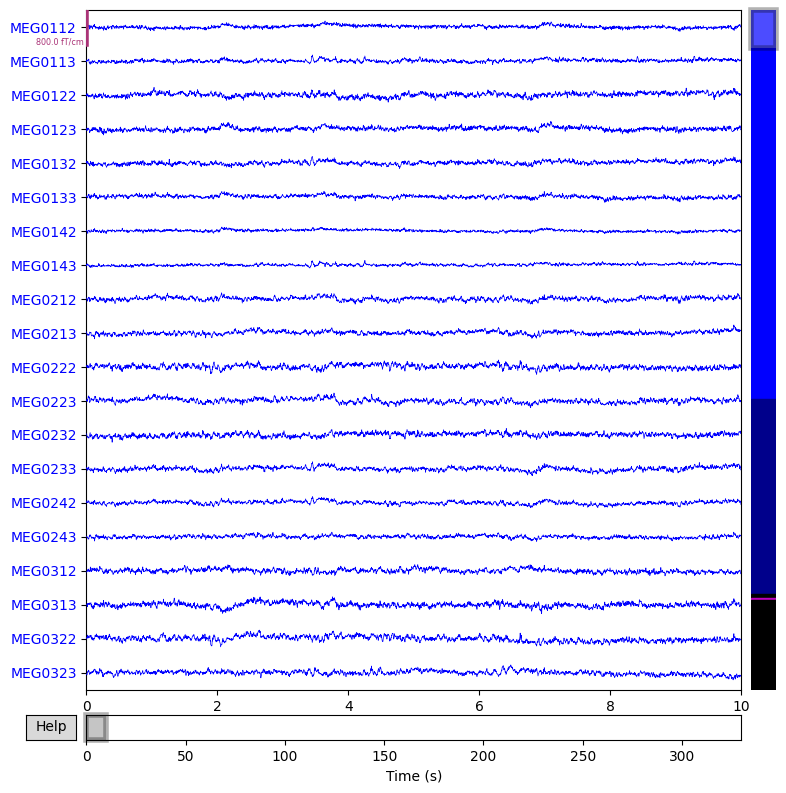

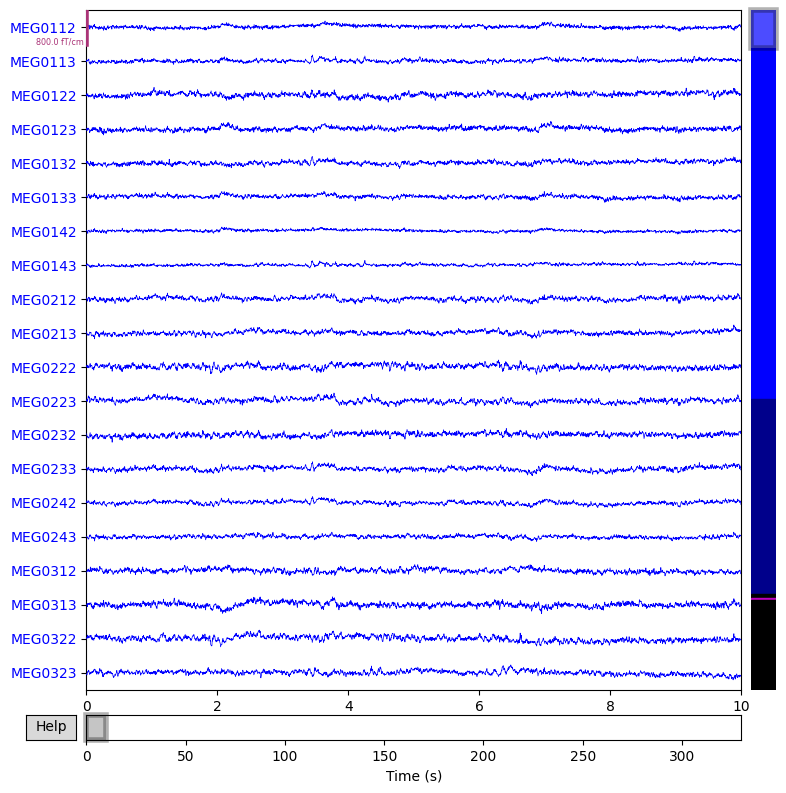

In [8]:
raw.plot()

In [9]:
raw.pick()

TypeError: pick() missing 1 required positional argument: 'picks'

In [11]:
# Make a copy and pick MEG channels by type
raw_meg = raw.copy().pick('meg')  # Magnetometers and gradiometers

# Apply filtering
#raw_meg_filtered = raw_meg.filter(l_freq=8.0, h_freq=12.0)


In [12]:
data_matrix = raw_meg.get_data()

In [13]:
print(data_matrix.shape)
type(data_matrix)

(306, 82500)


numpy.ndarray

In [23]:
sfreq = raw.info["sfreq"]

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/volatile/home/sb283337/miniconda3/envs/mfa-internship/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


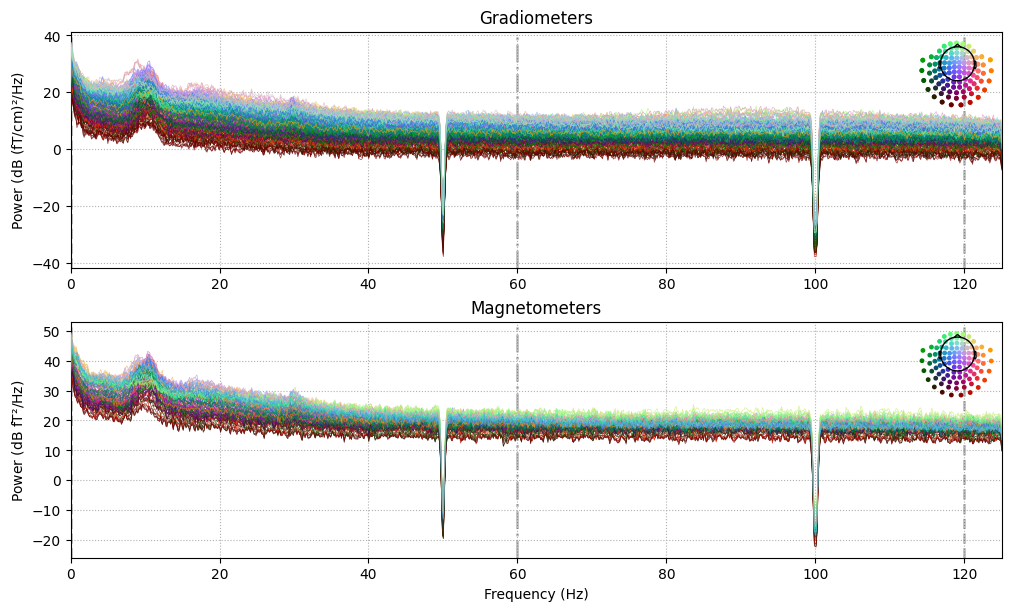

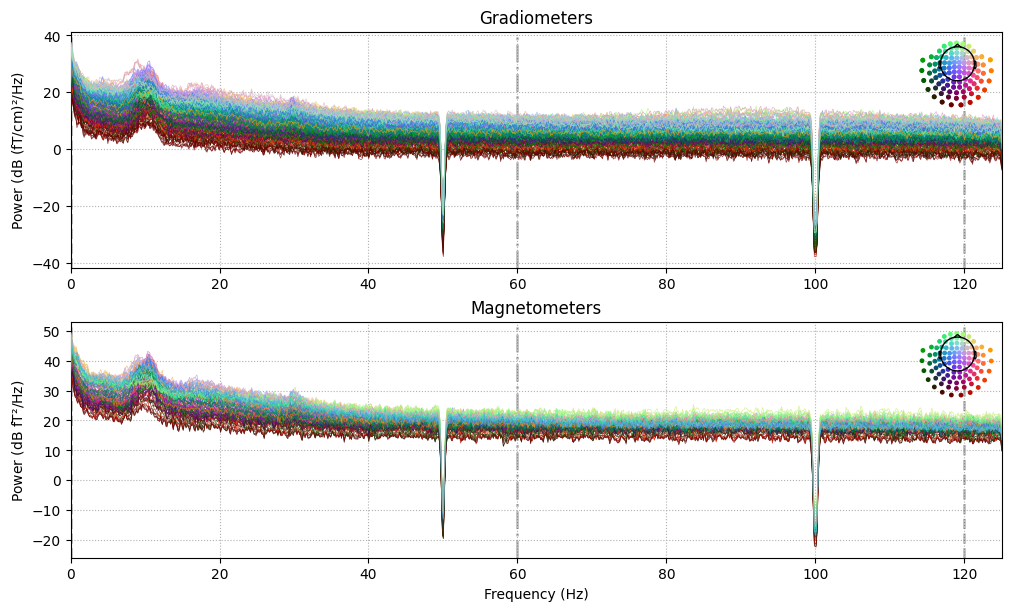

In [24]:
raw.plot_psd()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/volatile/home/sb283337/miniconda3/envs/mfa-internship/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


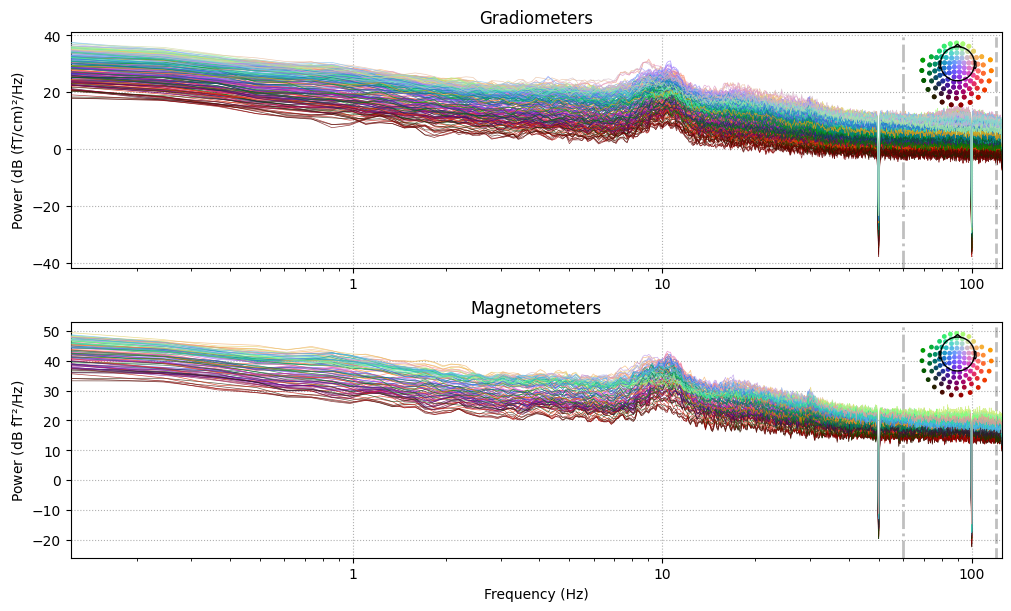

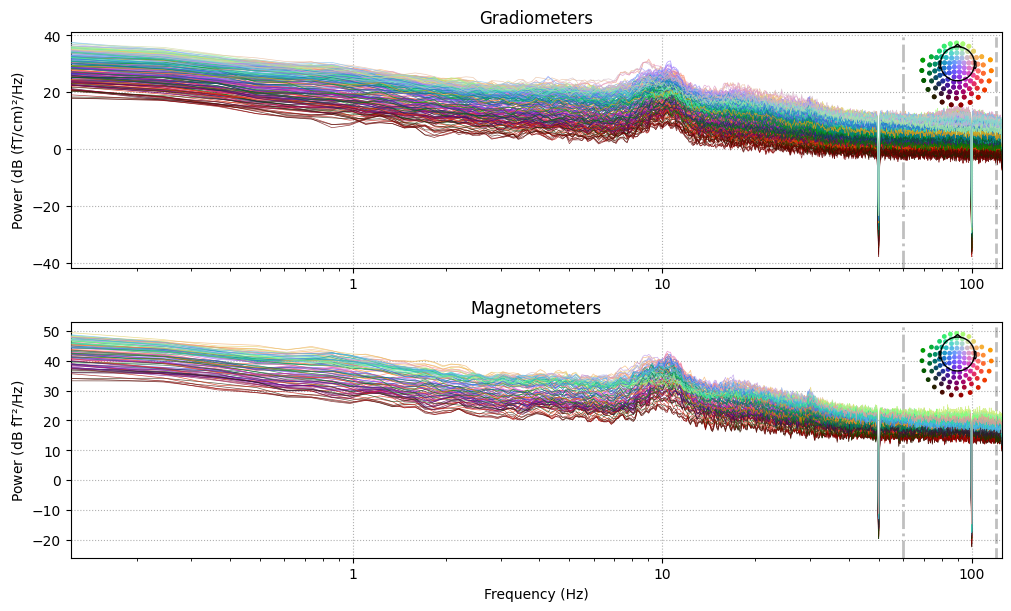

In [25]:
raw.plot_psd(xscale="log")

In [26]:
import matplotlib.pyplot as plt
from pymultifracs import wavelet_analysis, mfa
from pymultifracs.viz import plot_psd

In [27]:
X = data_matrix[2, 2000:-2000]

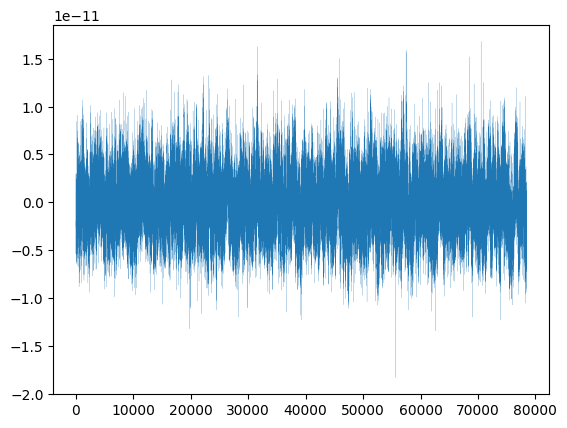

In [28]:
plt.plot(X, lw=.1)
plt.show()

In [29]:
%matplotlib inline

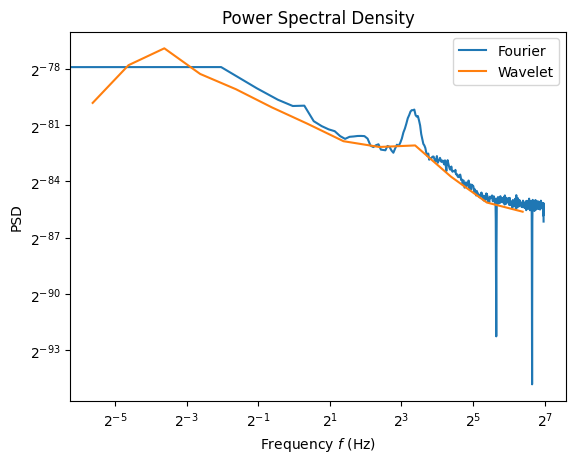

In [30]:
plot_psd(X, fs=sfreq, nperseg=2**10)

In [31]:
WT = wavelet_analysis(X, 'db6').integrate(1)

In [32]:
WT.freq2scale(2.0, sfreq)

np.float64(6.50635266602479)

In [33]:
WT.scale2freq(9, sfreq)

np.float64(0.35511363636363635)

In [34]:
dwt = mfa(WT, [(6, 11)])

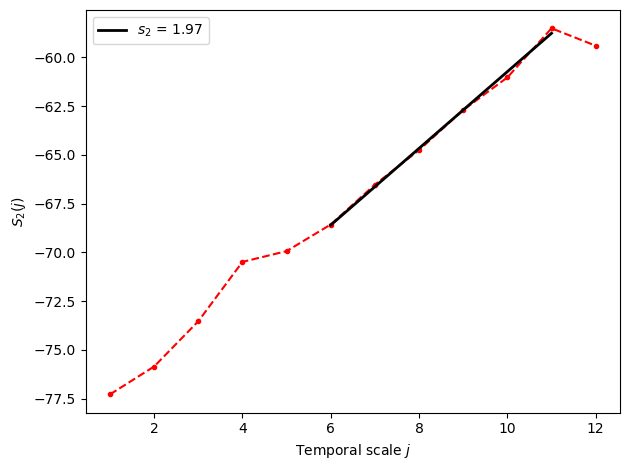

In [35]:
dwt.structure.plot()

In [36]:
H = float(dwt.structure.H.squeeze())

In [37]:
H

0.9841000814818832

In [38]:
from pymultifracs.simul import fbm

In [39]:
Y = fbm(shape=(2 ** 18), H=H)

In [ ]:
import numpy as np 
plt.plot(np.diff(Y), lw=.1)

NameError: name 'np' is not defined

In [ ]:
plot_psd(np.diff(Y) / np.diff(Y).std() * X.std(), sfreq)
plot_psd(X, sfreq)
plt.ylim(2**-89,2**-73)

NameError: name 'plot_psd' is not defined